In [ ]:
import io
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv') 
df2 = pd.read_csv('test.csv')

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In the train file, there are a lot of ages and cabin numbers missing

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Similarily, the test.csv is also missing quite an amount of ages and cabin numbers.

In [ ]:
data_train = df.replace({'Sex':{'male':0, 'female':1}}) #changing the genders into numbers to make it easier for graphs
data_test = df2.replace({'Sex':{'male':0, 'female':1}}) #doing the same for the test
data_train['Embarked'] = data_train['Embarked'].fillna('S') #fill the NaN value in Embarked with 'S' since it aligns the most with the data
data_test['Embarked'] = data_test['Embarked'].fillna('S')
data_train = data_train.replace({'Embarked':{'C':1, 'Q':2, 'S':3}}) #changing embarked locations to numbers for easier graphs
data_test = data_test.replace({'Embarked':{'C':1, 'Q':2, 'S':3}}) #same for the test
data_train.pop('Ticket')  
data_test.pop('Ticket')
data_train.pop('Cabin')
data_test.pop('Cabin')
data_train.pop('Name')
data_test.pop('Name')
data_test.pop('PassengerId')
data_train.pop('PassengerId')
print(data_train)
print(data_test)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.0      1      0   7.2500         3
1           1       1    1  38.0      1      0  71.2833         1
2           1       3    1  26.0      0      0   7.9250         3
3           1       1    1  35.0      1      0  53.1000         3
4           0       3    0  35.0      0      0   8.0500         3
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    0  27.0      0      0  13.0000         3
887         1       1    1  19.0      0      0  30.0000         3
888         0       3    1   NaN      1      2  23.4500         3
889         1       1    0  26.0      0      0  30.0000         1
890         0       3    0  32.0      0      0   7.7500         2

[891 rows x 8 columns]
     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    0  34.5      0      0    7.8292         2
1         3    1  47.0      1      0    7.0000         3
2         2  

We can remove the columns Ticket and Cabin number because they are hard to calculate if they have NaN values.

In [ ]:
data_train = data_train.dropna(subset = ['Age'])

In [ ]:
data_test = data_test.dropna(subset = ['Age'])

In [ ]:
display(data_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,2
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
889,1,1,0,26.0,0,0,30.0000,1


Dropped all the Age values that are NaN to make the data cleaner and easier to read.

In [ ]:
def create_bar_graph_survival(column, nameOfGraph, axis):
  survivors = data_train[data_train['Survived'] == 1][column].value_counts()
  deceased = data_train[data_train['Survived'] == 0][column].value_counts()
  finalGraph = pd.DataFrame([survivors, deceased])
  finalGraph.index = ['Survivors', 'Deceased']
  finalGraph.plot(kind='bar', stacked=False, figsize=(10,7), grid=True, title=nameOfGraph, xlabel=axis, ylabel="Number of Passengers")

Made a bar graph method found on stackoverflow that will create bar graphs based off of the survivors and dead people.

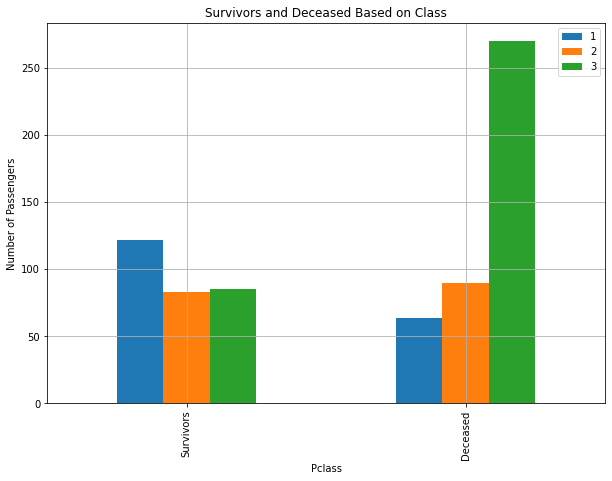

In [ ]:
create_bar_graph('Pclass', 'Survivors and Deceased Based on Class', 'Pclass')

According to this bar graph, most of the deceased are from the third class, while the most survivors are from the first class. We can infer that people from the third class had a lower chance of surviving than the first class.

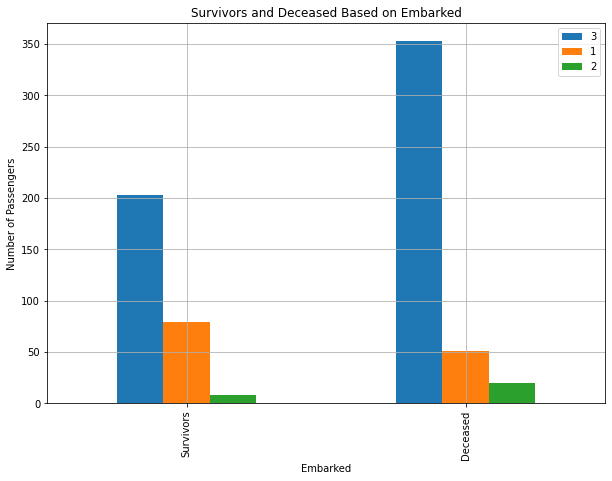

In [ ]:
create_bar_graph_survival('Embarked', 'Survivors and Deceased Based on Embarked', 'Embarked')

Based on this bar graph, most of the passengers are from Southhampton, while the least amount of passengers are from Queens.
1 = Cherbourg,
2 = Queens,
3 = Southhampton

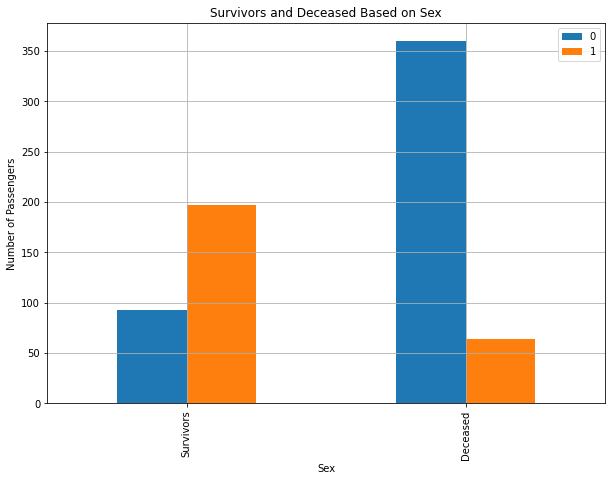

In [ ]:
create_bar_graph_survival('Sex', 'Survivors and Deceased Based on Sex', 'Sex')

According to the bar graph, there were more female survivors and more male deceased.

In [ ]:
def create_bar_graph_class(column, nameOfGraph, axis):
  passengers = data_train[data_train['Embarked'] == 1][column].value_counts()
  passengers1 = data_train[data_train['Embarked'] == 2][column].value_counts()
  passengers2 = data_train[data_train['Embarked'] == 3][column].value_counts()
  finalGraph = pd.DataFrame([passengers, passengers1, passengers2])
  finalGraph.index = ['Cherbourg', 'Queenstown', 'Southampton']
  finalGraph.plot(kind='bar', stacked=False, figsize=(10,7), grid=True, title=nameOfGraph, xlabel=axis, ylabel="Number of Passengers")

Creating method to create bar graphs that show the amount of people in each class from where they embarked.

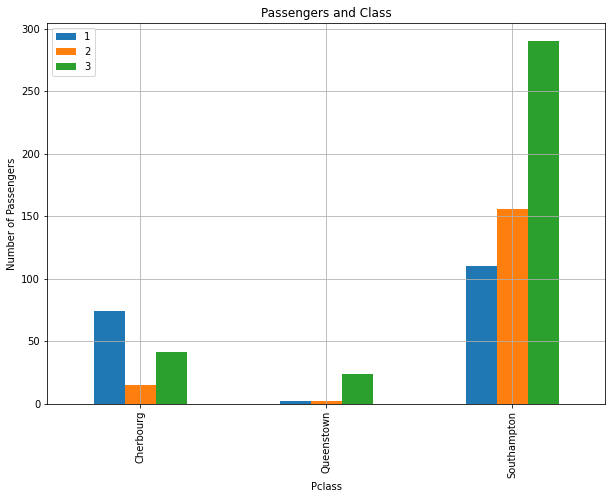

In [ ]:
create_bar_graph_class('Pclass', 'Passengers and Class', 'Pclass')

According to this graph, many passengers are from Southampton while the least amount of passengers are from Queenstown

Before modeling, have to convert everything to simple numerical values. First, we can bucket ages to have ranges.

In [ ]:
display(data_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,2
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
889,1,1,0,26.0,0,0,30.0000,1


In [ ]:
data_train.loc[data_train['Age'] <= 18, 'Age'] = 0
data_train.loc[(data_train['Age'] > 18) & (data_train['Age'] <=36), 'Age'] = 1
data_train.loc[(data_train['Age'] > 36) & (data_train['Age'] <=54), 'Age'] = 2
data_train.loc[data_train['Age'] > 54, 'Age'] = 3
data_test.loc[data_test['Age'] <= 18, 'Age'] = 0
data_test.loc[(data_test['Age'] > 18) & (data_test['Age'] <=36), 'Age'] = 1
data_test.loc[(data_test['Age'] > 36) & (data_test['Age'] <=54), 'Age'] = 2
data_test.loc[data_test['Age'] > 54, 'Age'] = 3

In [ ]:
display(data_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,7.2500,3
1,1,1,1,2.0,1,0,71.2833,1
2,1,3,1,1.0,0,0,7.9250,3
3,1,1,1,1.0,1,0,53.1000,3
4,0,3,0,1.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
885,0,3,1,2.0,0,5,29.1250,2
886,0,2,0,1.0,0,0,13.0000,3
887,1,1,1,1.0,0,0,30.0000,3
889,1,1,0,1.0,0,0,30.0000,1


Now, we can bucket the fares as well to have ranges. Ranges are based off of real Titanic ticket prices

In [ ]:
data_train.loc[data_train['Fare'] <= 7 , 'Fare'] = 0
data_train.loc[(data_train['Fare'] > 7) & (data_train['Fare'] <=12), 'Fare'] = 1
data_train.loc[(data_train['Fare'] > 12) & (data_train['Fare'] <= 30), 'Fare'] = 2
data_train.loc[data_train['Fare'] > 30, 'Fare'] = 3
data_test.loc[data_test['Fare'] <= 7 , 'Fare'] = 0
data_test.loc[(data_test['Fare'] > 7) & (data_test['Fare'] <=12), 'Fare'] = 1
data_test.loc[(data_test['Fare'] > 12) & (data_test['Fare'] <= 30), 'Fare'] = 2
data_test.loc[data_test['Fare'] > 30, 'Fare'] = 3

In [ ]:
display(data_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,1.0,3
1,1,1,1,2.0,1,0,3.0,1
2,1,3,1,1.0,0,0,1.0,3
3,1,1,1,1.0,1,0,3.0,3
4,0,3,0,1.0,0,0,1.0,3
...,...,...,...,...,...,...,...,...
885,0,3,1,2.0,0,5,2.0,2
886,0,2,0,1.0,0,0,2.0,3
887,1,1,1,1.0,0,0,2.0,3
889,1,1,0,1.0,0,0,2.0,1


Now, it is time for the modeling. I am starting with Support Vector Machine

In [ ]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]

In [ ]:
k_fold = KFold(n_splits=5, shuffle=False, random_state=None)
def KNeighborsModel():
  accuracy = cross_val_score(KNeighborsClassifier(n_neighbors=20), X_train, Y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
  precision = cross_val_score(KNeighborsClassifier(n_neighbors=20), X_train, Y_train, cv=k_fold, n_jobs=1, scoring='precision')
  recall = cross_val_score(KNeighborsClassifier(n_neighbors=20), X_train, Y_train, cv=k_fold, n_jobs=1, scoring='recall')
  totalaccuracy = 0
  for i in accuracy:
    totalaccuracy += i
  totalaccuracy/=5
  totalprecision = 0
  for i in precision:
    totalprecision+=i
  totalprecision/=5
  totalrecall = 0
  for i in recall:
    totalrecall+=i
  totalrecall/=5
  print("KNeighbor model scores (Accuracy, Precision, and Recall in order): ", totalaccuracy, ", ", totalprecision, ", ", totalrecall)
KNeighborsModel()


KNeighbor model scores (Accuracy, Precision, and Recall in order):  0.7675366886634493 ,  0.7526692733544164 ,  0.626947496947497


In [ ]:
def SVCModel():
  accuracy = cross_val_score(SVC(), X_train, Y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
  precision = cross_val_score(SVC(), X_train, Y_train, cv=k_fold, n_jobs=1, scoring='precision')
  recall = cross_val_score(SVC(), X_train, Y_train, cv=k_fold, n_jobs=1, scoring='recall')
  totalaccuracy = 0
  for i in accuracy:
    totalaccuracy += i
  totalaccuracy/=5
  totalprecision = 0
  for i in precision:
    totalprecision+=i
  totalprecision/=5
  totalrecall = 0
  for i in recall:
    totalrecall+=i
  totalrecall/=5
  print("SVC model scores (Accuracy, Precision, and Recall in order): ", totalaccuracy, ", ", totalprecision, ", ", totalrecall)
SVCModel()

SVC model scores (Accuracy, Precision, and Recall in order):  0.8039495715552054 ,  0.8008717750058807 ,  0.7002075702075702


In [ ]:
def DecisionTreeModel():
  accuracy = cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
  precision = cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=k_fold, n_jobs=1, scoring='precision')
  recall = cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=k_fold, n_jobs=1, scoring='recall')
  totalaccuracy=0
  for i in accuracy:
    totalaccuracy += i
  totalaccuracy/=5
  totalprecision = 0
  for i in precision:
    totalprecision+=i
  totalprecision/=5
  totalrecall = 0
  for i in recall:
    totalrecall+=i
  totalrecall/=5
  print("Decision Tree model scores (Accuracy, Precision, and Recall in order): ", totalaccuracy, ", ", totalprecision, ", ", totalrecall)
DecisionTreeModel()

Decision Tree model scores (Accuracy, Precision, and Recall in order):  0.7759676942775533 ,  0.7509702549113528 ,  0.6574732905982905
